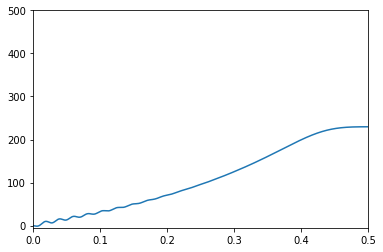

In [404]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
import math
from scipy import integrate
from scipy.integrate import ode
from scipy.integrate import quad
from scipy.integrate import trapz
%matplotlib inline


Vm = 230*1.414/1.732    #Phase peak voltage                 
freq = 50
w=2*np.pi *freq
# #mult_fac = (1/ (2 * np.pi * freq))
J = 0.0168        #moment of inertia
T_l = 5           #load torque
B= 0.006          #coefficient of friction 
P=4               #no of poles
Rs=2.177 #stator resistance
Rr=1.433 #rotor resistance
Lm=0.163 #mutual inductance
Lls=.00917 #stator leakage inductance
Llr=.00917 #rootor leakage inductance
# J = 0.089    
# T_l = 25          
# B= 0.006          
# P=4              
# Rs=.435
# Rr=.816
# Lm=26.13/w 
# Lls=.754/w
# Llr=.754/w 
 
Ls=Lm + Lls   #stator inductance
Lr=Lm + Llr   # rotor inductance
#V_mat =([1],[0],[3],[0])
R=([Rs,0,0,0],[0,Rs,0,0],[0,0,Rr,0],[0,0,0,Rr])      
#k=np.dot(R,V_mat)
#print(k)
L=([Ls,0,Lm,0],[0,Ls,0,Lm],[Lm,0,Lr,0],[0,Lm,0,Lr])
G=([0,0,0,0],[0,0,0,0],[0,Lm,0,Lr],[-Lm,0,-Lr,0])

vdq0=np.zeros((2,1))
vdq01=np.zeros((2,1))
vdq02=np.zeros((2,1))
vdq03=np.zeros((2,1))

v0=np.zeros((4,1))
v1=np.zeros((4,1))
v2=np.zeros((4,1))
v3=np.zeros((4,1))
i=np.zeros((4,1))
k1=np.zeros((4,1))
k2=np.zeros((4,1))
k3=np.zeros((4,1))
k4=np.zeros((4,1))
t0=0
k=0
wr=[] 
#wr[0]=0  #rotor speed initial value
Te0=0 
#Te[0]=0   #initial torque value
Te=[]
# tend=.5
h=.0001
n=200/50
step =round(n/h)
t=[]
for m in range(0,step ,1):
    r = 0
    t.append(r)
    wr.append(r)
    Te.append(r)
#print(t)
wr_values=[]
Te_values=[]
time=[]
for k in range(0,step,1):  
    #print(step)
    vdq0 = (.6667*Vm)*np.dot(([1,-.5,-.5],[0,.866,-.866]),([np.sin(w*t[k])] ,[np.sin(w*t[k] -.6667*np.pi)] ,[np.sin(w*t[k] + .6667*np.pi)]))
    vdq1 = (.6667*Vm)*np.dot(([1,-.5,-.5],[0,.866,-.866]),([np.sin(w*(t[k]+h/2))] ,[np.sin(w*(t[k]+h/2) -.6667*np.pi )] ,[np.sin(w*(t[k]+h/2) + .6667*np.pi)]))
    vdq2 = (.6667*Vm)*np.dot(([1,-.5,-.5],[0,.866,-.866]),([np.sin(w*(t[k]+h/2))] ,[np.sin(w*(t[k]+h/2) -.6667*np.pi )] ,[np.sin(w*(t[k]+h/2) + .6667*np.pi)]))
    vdq3 = (.6667*Vm)*np.dot(([1,-.5,-.5],[0,.866,-.866]),([np.sin(w*(t[k]+h))] ,[np.sin(w*(t[k]+h) -.6667*np.pi )] ,[np.sin(w*(t[k]+h) + .6667*np.pi)]))
#     vdq0 = (2.*Vm/3)*([np.sin(w*t[k])-.5*np.sin(w*t[k] -2.*np.pi /3)-.5*np.sin(w*t[k] + 2.*np.pi/3)],[.866*np.sin(w*t[k] -2.*np.pi /3)-.866*np.sin(w*t[k] + 2*np.pi/3)])
    #vdq1 = (2.*Vm/3)*([np.sin(w*(t[k]+h/2))-.5*np.sin(w*(t[k]+h/2) -2*np.pi /3)-.5*np.sin(w*(t[k]+h) + 2*np.pi/3)],[.866*np.sin(w*t[k] -2*np.pi /3)-.866*np.sin(w*(t[k]+h) + 2*np.pi/3)])
      
    
    v0[0] = vdq0[0]
    v0[1] = vdq0[1]
    v1[0] = vdq1[0]
    v1[1] = vdq1[1]
    v2[0] = vdq2[0]
    v2[1] = vdq2[1]
    v3[0] = vdq3[0]
    v3[1] = vdq3[1]
    
    wrk=round(np.float(wr[k]),4)
    
#     print (v0)
#     print (v1[0], v1[1])
#     print (v3[0], v3[1])
    
#     wrk=(wr[k])
#     print(wr[k])
    k1=np.dot((np.linalg.inv(L)),(v0-(np.dot(R,i))+wrk*np.dot(G,i)))
    k2=np.dot((np.linalg.inv(L)),((v1+np.dot((h/2),k1))-(np.dot(R,(i+np.dot((h/2),k1)))+wrk*np.dot(G,(i+np.dot((h/2),k1))))))
    k3=np.dot((np.linalg.inv(L)),((v2+np.dot((h/2),k2))-(np.dot(R,(i+np.dot((h/2),k2)))+wrk*np.dot(G,(i+np.dot((h/2),k2))))))                                                                                     
    k4=np.dot((np.linalg.inv(L)),((v3+np.dot((h),k3))-(np.dot(R,(i+np.dot((h),k3)))+wrk*np.dot(G,(i+np.dot((h),k3))))))
#     print(np.linalg.inv(L))
# #     if ( k < 2):
#         print ("values of k")
#     print ("k1", k1)
#     print ("k2", k2)
#     print ("k3", k3)
#     print ("k4", k4)
    
    i=i + np.dot((k1 + 2*k2+ 2*k3+ k4),(h/6))
#     print (i)
    i0=round(np.float(i[0]),4)
    i1=round(np.float(i[1]),4)
    i2=round(np.float(i[2]),4)
    i3=round(np.float(i[3]),4)
#     i1=round(i[1],4)
    q=k+1
    if q == step:
         break
    Te[q]=(3*Lm*((i[2] * i[1]) -(i[3] *i[0])))
#     Te[q]=(3*Lm*(i[2] * i[1] -i[3] *i[0]))
    
#     wr[q] = ((((Te[k])-T_l )-.5*B*wr[k])*2*h/J) + wr[k]
    wr[q] =round( float ((((Te[k])-T_l )*2*h/J) + wr[k]),4)

    t[q] =t[k] + h
   
    Te_values.append(Te[q])
    wr_values.append(.5*(wr[q]))
    time.append(t[q])
    
# print(i)
# print (v0)
# print(v1)
# print(v2)
# print(v3)



# plt.plot(time,Te_values)

# plt.axis([0,0.5,-5,100])
# plt.show()
plt.plot(time,(wr_values))
plt.axis([0,0.5,-5,500])
plt.show()
# plt.plot((wr_values),Te_values)
# plt.axis([0,500,-2.5,100])
# plt.show()
